## Simulate a non-stationary time series

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

$I(1)$ Process: $v[k]=v[k-1]+e[k]$

In [16]:
ar = np.array([1,-1])
ma = np.array([1])

In [17]:
arma_process= sm.tsa.ArmaProcess(ar, ma)

$D(z^{-1})=1-z^{-1}$ <br>
Root of this polynomial $1-z^{-1}=0$ is $-1$ (in terms of $z^{-1}$)

In [18]:
arma_process.arroots

array([1.])

No MA polynomial

In [19]:
arma_process.maroots

array([], dtype=float64)

Since the roots are on the unit circle (Unit root in the AR polynomial)

In [20]:
arma_process.isstationary & arma_process.isinvertible

False

Generate a time series $v[k]$ of 500 observations

In [21]:
vk_array=arma_process.generate_sample(500)

In [22]:
vk=pd.Series(vk_array)

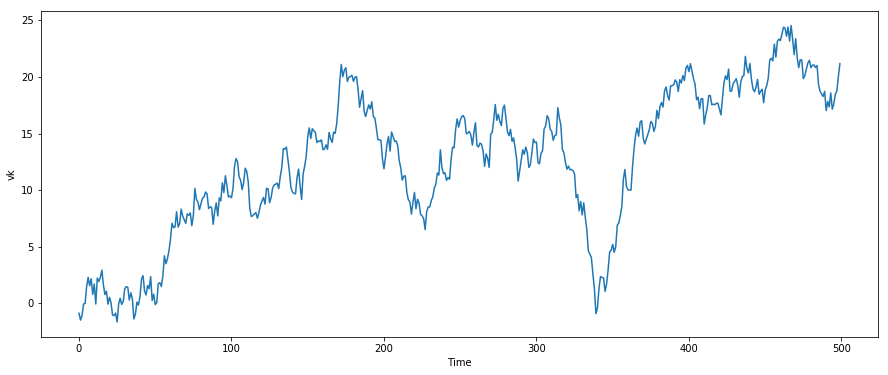

In [23]:
ylabel='vk'
xlabel='Time'
ax = vk.plot(figsize=(15,6))
ax.set(xlabel=xlabel, ylabel=ylabel);

## Time Series Modelling

Forget the process that we used to generate this time series. Assume we are given with the time series $v[k]$

In [24]:
# Step 1: Summary Statistic of vk
vk.describe()

count    500.000000
mean      12.483716
std        6.364227
min       -1.648066
25%        8.554970
50%       13.560348
75%       17.530930
max       24.551020
dtype: float64

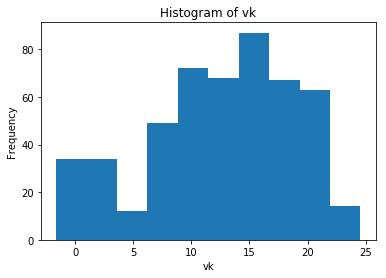

In [25]:
# Step 2: Test whether the series v[k] has fallen out of a joint Gaussian
title = 'Histogram of vk'
ylabel='Frequency'
xlabel='vk'
ax = vk.plot.hist(title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [26]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

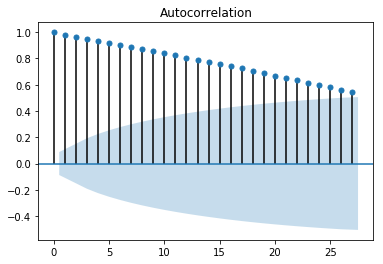

In [27]:
plot_acf(vk);

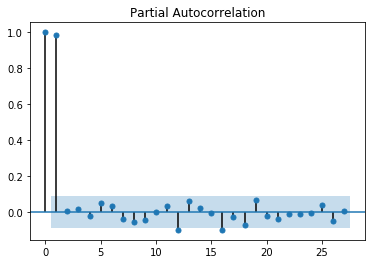

In [28]:
plot_pacf(vk);

In [31]:
# To get the numbers
acf_array = sm.tsa.stattools.acf(vk, nlags=20, fft=False)
pacf_array = sm.tsa.stattools.pacf(vk, nlags=20)

## Tests for Unit Root

In [29]:
from statsmodels.tsa.stattools import adfuller, kpss

In [40]:
# Null hypothesis: The series has a unit root
adfuller(vk)

(-2.0594334857181447,
 0.26113619261240806,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 1313.2269757019644)

$p-value$ is high, 0.2611. We do not have enough evidence to reject the null hypothesis.<br>
So there is a unit root in the AR polynomial

In [34]:
# Null hypothesis: The series is stationary around a constant
kpss(vk, nlags='legacy')

C:\Users\132793\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(1.4838662117244463,
 0.01,
 18,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Null hypothesis is rejected. This also confirms that the series is not stationary. Let's difference the series.

In [35]:
vdk = vk.diff()

$ vdk=e[k]$

In [37]:
adfuller(vdk[1:])

(-22.6458665276487,
 0.0,
 0,
 498,
 {'1%': -3.4435494520411605,
  '5%': -2.8673612117611267,
  '10%': -2.5698704830567247},
 1313.9267083178543)

Smaller p-value. Null hypothesis is rejected. $vdk$ has no unit root.

In [39]:
kpss(vdk[1:], nlags='legacy')

C:\Users\132793\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.05619510668282518,
 0.1,
 18,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Now the series is stationary